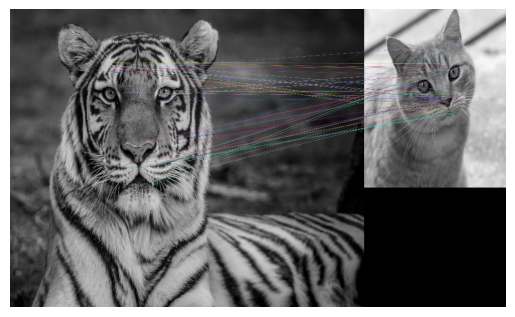

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image1 = cv.imread("C:/Users/ragha/Downloads/tiger.jpeg")
image1 = cv.cvtColor(image1  , cv.COLOR_BGR2GRAY)
image2 = cv.imread("C:/Users/ragha/Downloads/Cat03.jpg")
image2 = cv.cvtColor(image2 , cv.COLOR_BGR2GRAY)

orb = cv.ORB_create()
kp1 , des1 = orb.detectAndCompute(image1 , None)
kp2 , des2 = orb.detectAndCompute(image2 , None)

bf = cv.BFMatcher(cv.NORM_HAMMING2 , crossCheck= True)
matches = bf.match(des1 , des2)

matches = sorted(matches , key = lambda x: x.distance)

img_match = cv.drawMatches(image1 , kp1 , image2 , kp2 , matches[: 50]  , None , flags = 2)

img_match = cv.resize(img_match , (1000,600))
plt.imshow(img_match)
plt.axis("OFF")
cv.imshow("veds" , img_match)
cv.waitKey(0)
cv.destroyAllWindows()

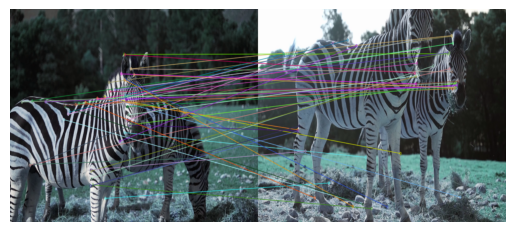

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

video1 = cv.VideoCapture("C:/Users/ragha/Downloads/zebra1.mp4")
video2 = cv.VideoCapture("C:/Users/ragha/Downloads/zebra2.mp4")
while True :
    ret , frame = video1.read()
    ret1 , frame2 = video2.read()
    if not ret :
        break
    if not ret1:
        break
    frame = cv.resize(frame , (900,500))
    frame2 = cv.resize(frame2 , (900 , 500))
    #frame = cv.cvtColor(frame , cv.COLOR_BGR2GRAY)
    #clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    #frame = clahe.apply(frame)
    #frame2 = cv.cvtColor(frame2 , cv.COLOR_BGR2GRAY)
    #frame2 = clahe.apply(frame2)

    orb = cv.ORB_create()
    kp1 , des1 = orb.detectAndCompute(frame , None)
    kp2 , des2 = orb.detectAndCompute(frame2 , None)

    bf = cv.BFMatcher(cv.NORM_HAMMING2 , crossCheck= True)
    matches = bf.match(des1 , des2)
    matches = sorted(matches , key = lambda x:x.distance)

    img_match = cv.drawMatches(frame , kp1 , frame2 , kp2 , matches[: 50] , None , flags = 2)

    img_match = cv.resize(img_match , (1400,600))
    #img_match = cv.cvtColor(img_match , cv.COLOR_BGR2RGB)
    cv.imshow("zebra eating" , img_match)
    plt.imshow(img_match)
    plt.axis("OFF")

    if cv.waitKey(25) & 0xFF == ord('q'):
        break

video1.release()
video2.release()
cv.destroyAllWindows()    